# Differences in Geodetic Latitude
NSIDC EASE-Grid map projections use both spheroids and ellipsoids for horizontal datums.  Knowing whether the data you are using is on a projection based on a spheroidal or ellipsoidal data is important because latitudes will be different for the same geographic location on the Earth surface.  This notebook explains the difference. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def geodetic_datum_definition(f=0.1, latitude=60.):
    """Plots a figure to explain difference between geodetic and geocentric latitude""" 
    #f = 0.1  # flattening 
    a = 1.  # Semi-major axis 
    b = a * (1 - f)  # Semi-minor axis 
    t = np.linspace(0., 2*np.pi, 100) 
     
    xs, ys = spheroid(t, a) 
    xe, ye = ellipsoid(t, a, b) 
    xp, yp = ellipsoid(60*np.pi/180., a, b) 
    xn, yn = normal_line2(xp, yp, a, b) 
     
    fig, ax = plt.subplots(figsize=(7,7)) 
    ax.plot(xe, ye, 'orange') 
    ax.plot(xs, ys, 'k--') 
    ax.plot(xp, yp, marker='o', ms=15, mfc='orange', mec='k') 
    ax.plot(0., 0., marker='o', ms=15, mfc='0.2', mec='k') 
    ax.plot([0.,xp], [0.,yp], ls='-', color='k', zorder=0) 
    ax.plot(xn, yn, ls='-', color='r', zorder=0) 
    ax.axhline(0, c='k') 
    ax.axvline(0, c='k') 
    ax.axis('off') 
    return fig, ax 


def normal_line2(x1, y1, a, b):
    x0 = x1 * (1 - b**2/a**2)  
    return [x0, x1], [0., y1] 

            
def ellipsoid(t, a, b):
    """returns x, y for ellipse or for point on an ellipse"""
    return a*np.cos(t), b*np.sin(t)
                                                                                                                                                                                                    

def spheroid(t, a):
    """Returns x, y for a circle or a point on a circle"""
    return a*np.cos(t), a*np.sin(t) 



(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9277945908>)

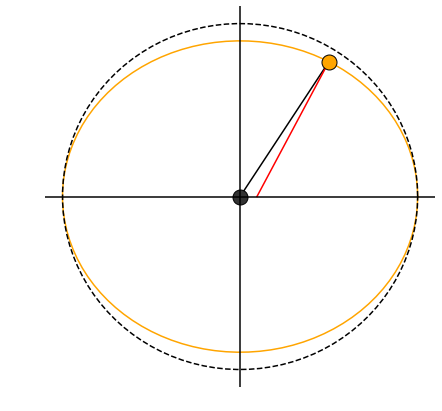

In [8]:
geodetic_datum_definition()